### Data Representation inScikit-Learn

#### Data as a table

In [1]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


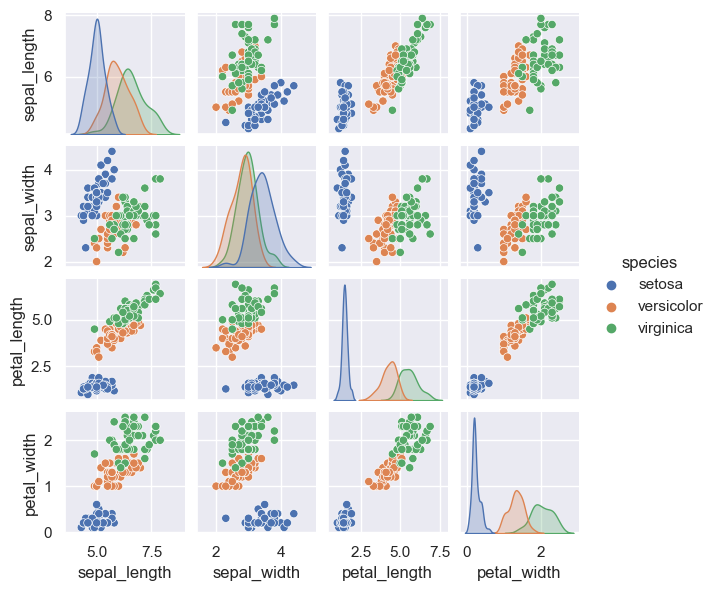

In [2]:
sns.set()
sns.pairplot(iris, hue='species',height=1.5);

In [3]:
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris=iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

#### Supervised Learning example:Simple linear regression

In [5]:
import matplotlib.pyplot as plt
import numpy as np

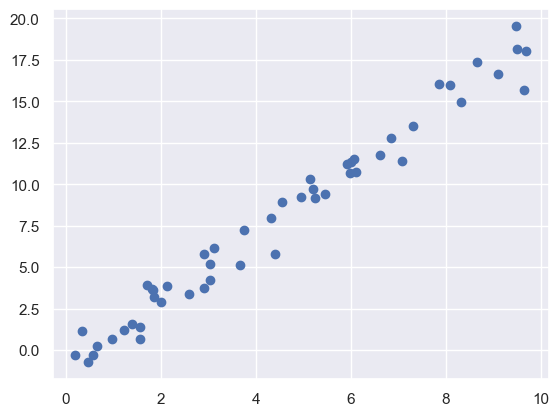

In [6]:
%matplotlib inline
rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y);

###### Choose a class of model

In [7]:
from sklearn.linear_model import LinearRegression

###### Choose model hyperparameters.


In [8]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

###### Arrange data into a features matrix and target vector.

In [9]:
X=x[:,np.newaxis]
X.shape

(50, 1)

###### Fit the model to your data

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

###### Predict labels for unknown data.

In [13]:
xfit=np.linspace(-1,11)

In [14]:
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)

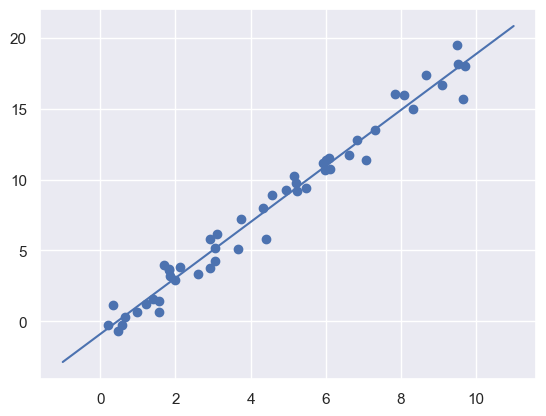

In [15]:
plt.scatter(x,y)
plt.plot(Xfit,yfit);

#### Supervised learning example: Iris classification

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest=train_test_split(X_iris,y_iris,
                                            random_state=1)

In [17]:
from sklearn.naive_bayes import GaussianNB#model class
model=GaussianNB()                       #Instantiate model
model.fit(Xtrain,ytrain)                 #fit model to data
y_model=model.predict(Xtest)             #predict on new data

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

#### Unsupervised learning example: Iris dimensionality

In [19]:
from sklearn.decomposition import PCA #model class
model=PCA(n_components=2)#instantiate the model with hyperameters
model.fit(X_iris)#fit to data. notice y is not specified
X_2D=model.transform(X_iris)#Transform the data to two dimension

In [20]:
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]


In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


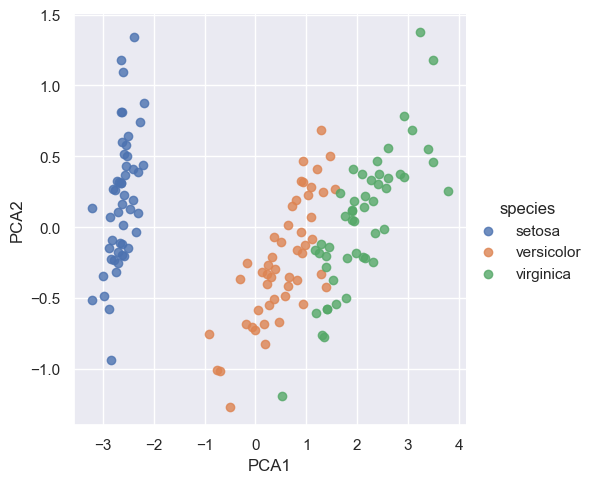

In [22]:
sns.lmplot(x='PCA1',y='PCA2', hue='species', data=iris, fit_reg=False);

#### Unsupervised learning: Iris clustering

In [23]:
from sklearn.mixture import GaussianMixture as GMM#model class
model=GMM(n_components=3,
         covariance_type='full')#Instantiate the model with h-params
model.fit(X_iris)#fit model to data
y_gmm=model.predict(X_iris)#determine cluster labels

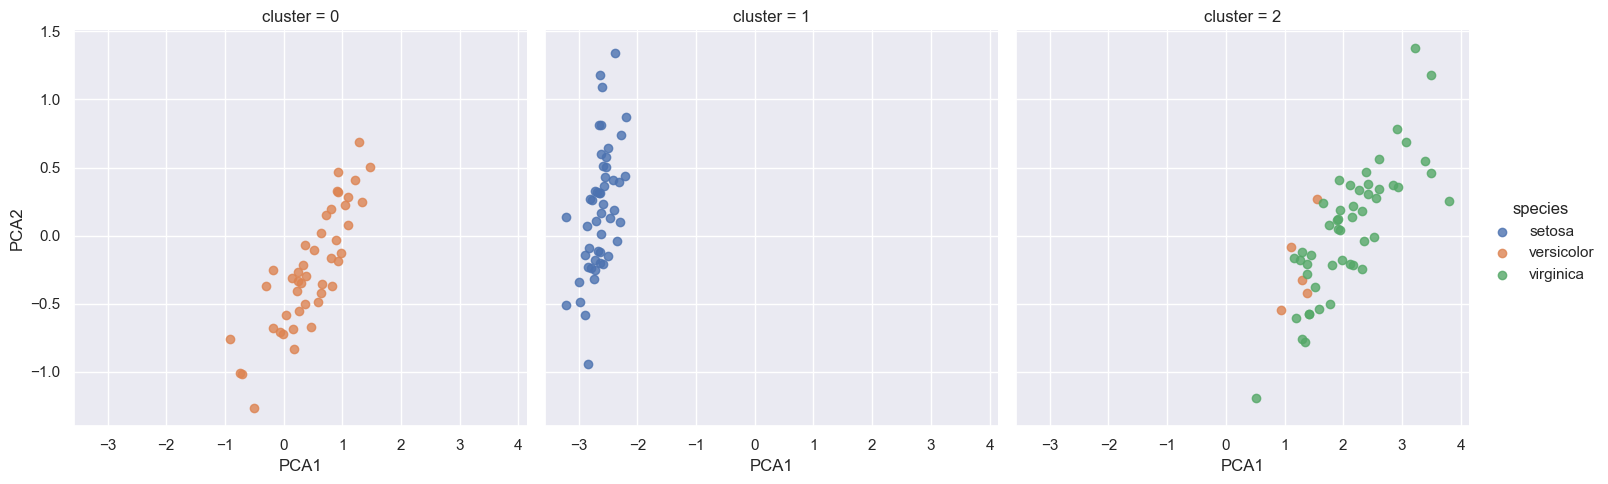

In [24]:
iris['cluster']=y_gmm
sns.lmplot(x="PCA1",y='PCA2', data=iris, hue='species', col='cluster',
          fit_reg=False);

#### Application: Exploring Handwritten Digits

##### Loading and visualizing the digits data

In [25]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

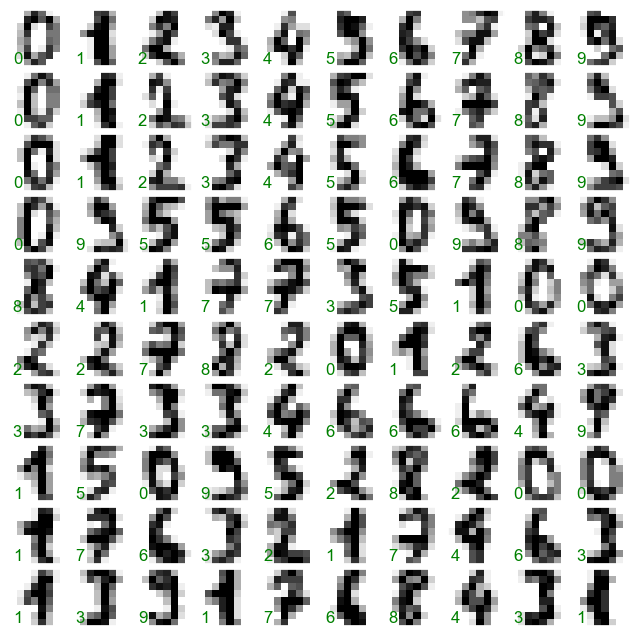

In [26]:
fig, axes=plt.subplots(10,10, figsize=(8,8),
                    subplot_kw={'xticks':[],'yticks':[]},
                    gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),
                           transform=ax.transAxes,color='green')

In [27]:
X=digits.data
X.shape

(1797, 64)

In [28]:
y=digits.target
y.shape

(1797,)

#### Unsupervised learning: Dimensionality reduction


In [29]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\User\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

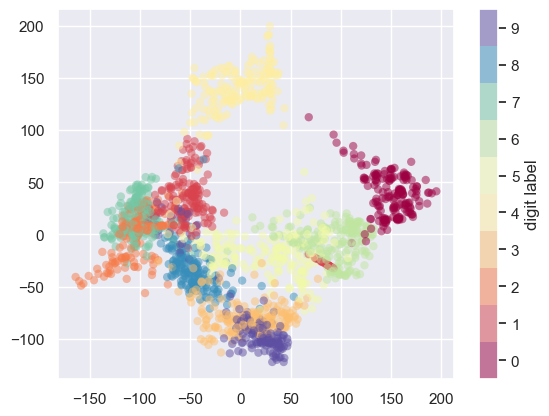

In [30]:
plt.scatter(data_projected[:,0], data_projected[:,1],c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5);

#### Classification on digits

In [31]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain, ytrain)
y_model=model.predict(Xtest)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

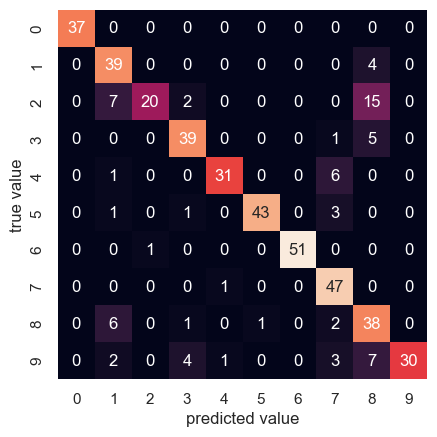

In [34]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

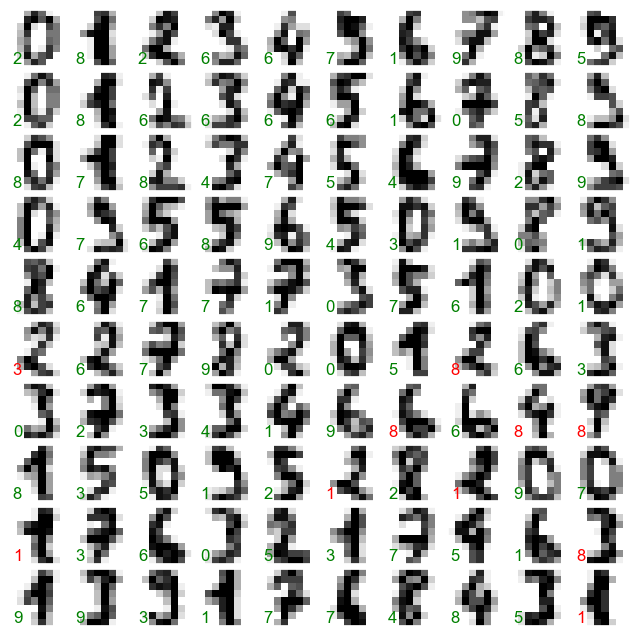

In [35]:
fig, axes=plt.subplots(10,10, figsize=(8,8),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05, str(y_model[i]),
           transform=ax.transAxes,
            color='green' if (ytest[i]==y_model[i]) else 'red')

In [36]:
import warnings
warnings.filterwarnings('ignore')